In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [5]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

In [6]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=-1, inplace=True)

for i in [train, test]:
    i['brand_price'] = i['brand'].copy()


C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

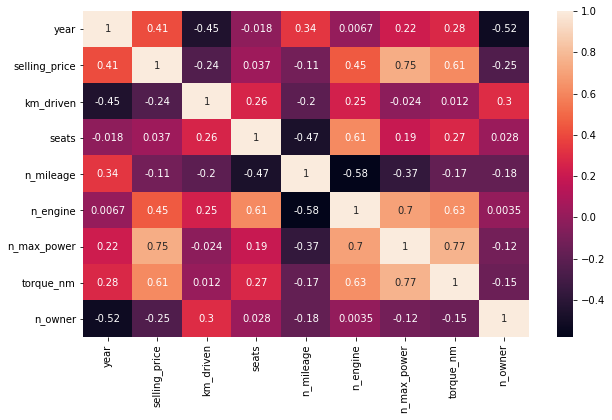

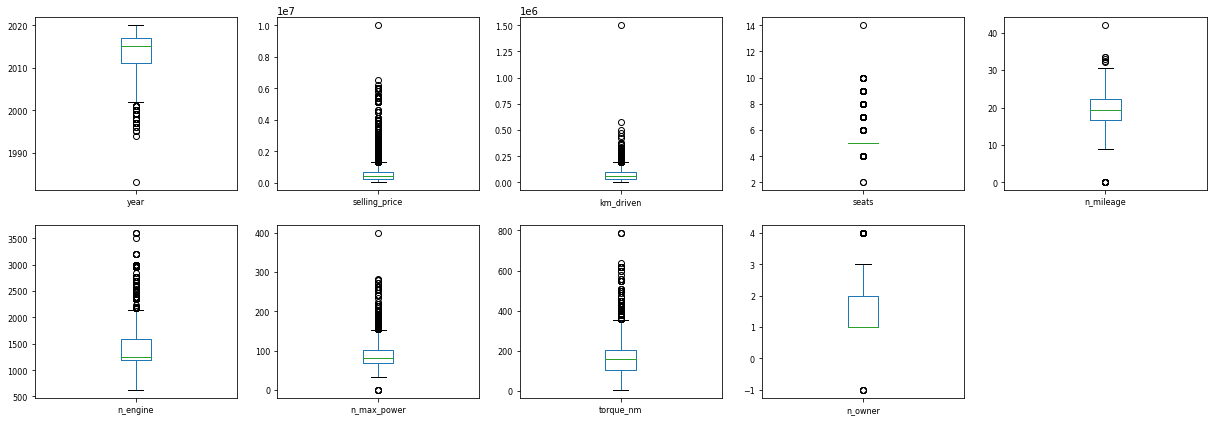

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

In [8]:
#train = train[train['selling_price'] < 9000000]

In [9]:
#train = pd.concat([train, pd.get_dummies(train.brand, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

#test = pd.concat([test, pd.get_dummies(test.brand, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [10]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [11]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,1582.0,126.20,259.90,2,1,0,0,1,1,0


<AxesSubplot:title={'center':'selling_price'}, xlabel='owner'>

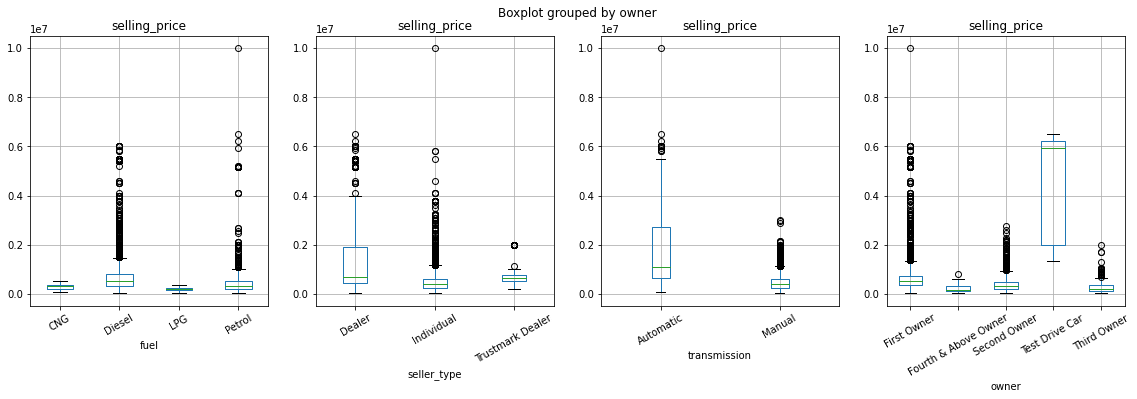

In [12]:
fig, axes = plt.subplots(1,4, figsize=(19,5))
train.boxplot(column='selling_price', by='fuel', rot=30, ax=axes[0])
train.boxplot(column='selling_price', by='seller_type', rot=30, ax=axes[1])
train.boxplot(column='selling_price', by='transmission', rot=30, ax=axes[2])
train.boxplot(column='selling_price', by='owner', rot=30, ax=axes[3])

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

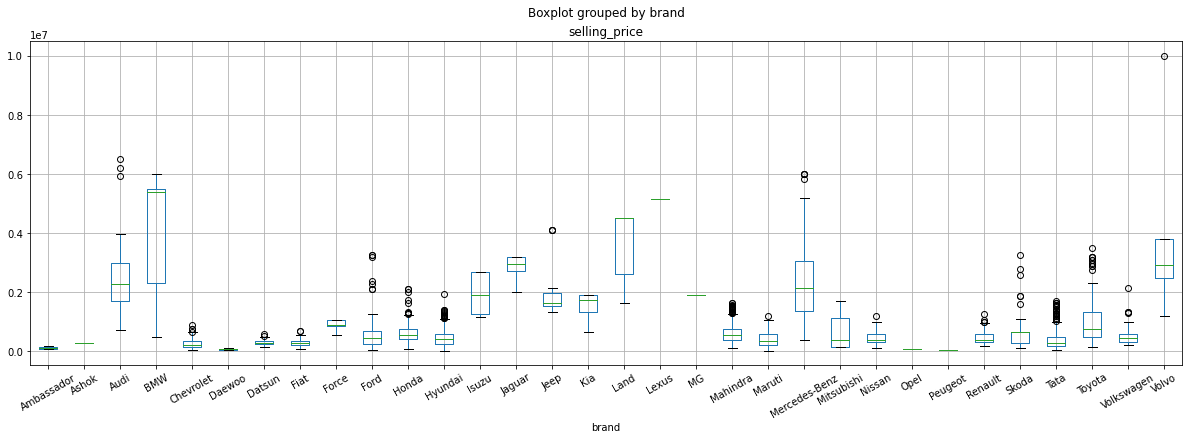

In [13]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [14]:
train.groupby('brand').agg('mean').selling_price/100000

brand
Ambassador        1.246667
Ashok             3.000000
Audi             26.587999
BMW              40.657831
Chevrolet         2.709823
Daewoo            0.725000
Datsun            3.166530
Fiat              3.032894
Force             8.830000
Ford              5.212743
Honda             5.956358
Hyundai           4.542093
Isuzu            19.420000
Jaguar           29.048846
Jeep             19.865652
Kia              15.045000
Land             36.083333
Lexus            51.500000
MG               19.000000
Mahindra          6.177663
Maruti            4.033088
Mercedes-Benz    25.532955
Mitsubishi        6.495833
Nissan            4.829500
Opel              0.680000
Peugeot           0.570000
Renault           4.571768
Skoda             6.358441
Tata              3.689275
Toyota            9.519480
Volkswagen        5.036765
Volvo            32.175000
Name: selling_price, dtype: float64

In [15]:
train.groupby('brand').agg('median').selling_price/100000

brand
Ambassador        0.990000
Ashok             3.000000
Audi             22.875000
BMW              54.000000
Chevrolet         2.200000
Daewoo            0.725000
Datsun            3.000000
Fiat              2.825000
Force             9.100000
Ford              4.415000
Honda             5.700000
Hyundai           4.250000
Isuzu            19.000000
Jaguar           29.555000
Jeep             16.500000
Kia              17.375000
Land             45.000000
Lexus            51.500000
MG               19.000000
Mahindra          5.500000
Maruti            3.600000
Mercedes-Benz    21.495000
Mitsubishi        3.950000
Nissan            3.950000
Opel              0.680000
Peugeot           0.570000
Renault           3.950000
Skoda             6.450000
Tata              2.900000
Toyota            7.500000
Volkswagen        4.374995
Volvo            29.375000
Name: selling_price, dtype: float64

In [16]:
train.brand.value_counts()

Maruti           1792
Hyundai          1034
Mahindra          595
Tata              546
Toyota            366
Honda             335
Ford              288
Chevrolet         170
Renault           164
Volkswagen        136
BMW                83
Skoda              77
Nissan             60
Jaguar             52
Volvo              50
Datsun             49
Mercedes-Benz      44
Fiat               38
Audi               30
Lexus              27
Jeep               23
Mitsubishi         12
Land                6
Isuzu               5
Force               5
Kia                 4
Ambassador          3
Daewoo              2
Opel                1
MG                  1
Ashok               1
Peugeot             1
Name: brand, dtype: int64

In [17]:
test.brand.value_counts()

Maruti           656
Hyundai          381
Tata             188
Mahindra         177
Honda            132
Toyota           122
Ford             109
Renault           64
Chevrolet         60
Volkswagen        50
BMW               37
Skoda             28
Nissan            21
Jaguar            19
Volvo             17
Datsun            16
Audi              10
Mercedes-Benz     10
Fiat               9
Jeep               8
Lexus              7
Mitsubishi         2
MG                 2
Force              1
Daewoo             1
Ambassador         1
Name: brand, dtype: int64

In [ ]:
for i in [train, test]:
    i.seats.fillna(i.seats.median(),inplace=True)

In [19]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

# Build model

In [20]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [21]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,1582.0,126.20,259.90,2,1,0,0,1,1,0


In [22]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)
y = train['selling_price']

In [23]:
x

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,2018,30000,5.0,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,2015,80000,7.0,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,2015,35000,5.0,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,2019,20000,5.0,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,50000,5.0,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,2018,40000,5.0,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,2018,75000,5.0,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,2011,100000,9.0,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [24]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)

In [25]:
x_test

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2017,35000,5.0,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,2014,80000,5.0,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,2014,145241,7.0,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,2015,92651,5.0,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2020,2000,5.0,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2018,100000,5.0,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2011,172000,5.0,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2017,47000,5.0,1582.0,126.20,259.90,2,1,0,0,1,1,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

result = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(20,31):
    extra_tree = RandomForestRegressor(random_state=42, max_depth=i, n_estimators=50)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result = result.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result.sort_values(by='Val_RMSE')

In [28]:
result1 = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(10,20):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=80)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result1 = result1.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result1.sort_values(by='Val_RMSE')

,max_depth,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
5,15.0,41274.359999,0.997388,119014.234893,0.978013
6,16.0,35269.438473,0.998093,120643.096102,0.977407
4,14.0,50025.453482,0.996163,121231.494896,0.977186
3,13.0,57228.487895,0.994978,122525.911772,0.976696
2,12.0,66341.711262,0.993251,124685.256454,0.975868
1,11.0,77073.823714,0.990891,124880.665153,0.975792
8,18.0,26439.487665,0.998928,125541.167363,0.975535
0,10.0,89123.184171,0.987821,125879.628199,0.975403
7,17.0,30628.674661,0.998562,129247.413644,0.974069
9,19.0,23152.410073,0.999178,131082.539556,0.973328


In [29]:
result2 = pd.DataFrame(columns=['n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(80,101):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=15, n_estimators=i)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result2 = result2.append(pd.Series({'n_es': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result2.sort_values(by='Val_RMSE')

,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
7,87.0,41392.261053,0.997373,118492.179402,0.978205
8,88.0,41438.964822,0.997367,118597.089663,0.978167
10,90.0,41527.955713,0.997356,118597.504597,0.978167
12,92.0,41434.993249,0.997367,118712.969765,0.978124
9,89.0,41528.657437,0.997356,118760.574928,0.978106
11,91.0,41483.453648,0.997361,118794.777534,0.978094
6,86.0,41353.685381,0.997378,118884.141066,0.978061
13,93.0,41510.376449,0.997358,118918.935257,0.978048
5,85.0,41360.031711,0.997377,118958.423185,0.978033
1,81.0,41408.773688,0.997371,119004.743842,0.978016


In [32]:
result3 = pd.DataFrame(columns=['max_depth','n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(11,17):
    for j in range(60,101):
        extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=j)
        extra_tree.fit(x_train,y_train)

        train_pred = extra_tree.predict(x_train)
        val_pred = extra_tree.predict(x_val)

        train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
        train_r2 = metrics.r2_score(y_train, train_pred)
        val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
        val_r2 = metrics.r2_score(y_val, val_pred)

        result3 = result3.append(pd.Series({'max_depth': i,'n_es': j, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result3.sort_values(by='Val_RMSE')

,max_depth,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
191,15.0,87.0,41392.261053,0.997373,118492.179402,0.978205
192,15.0,88.0,41438.964822,0.997367,118597.089663,0.978167
194,15.0,90.0,41527.955713,0.997356,118597.504597,0.978167
196,15.0,92.0,41434.993249,0.997367,118712.969765,0.978124
193,15.0,89.0,41528.657437,0.997356,118760.574928,0.978106
...,...,...,...,...,...,...
45,12.0,64.0,66083.414018,0.993304,125865.206582,0.975409
44,12.0,63.0,66246.548090,0.993271,125890.112680,0.975399
43,12.0,62.0,66133.105733,0.993294,125971.064133,0.975367
42,12.0,61.0,65984.931920,0.993324,126127.068841,0.975306


In [33]:
extra_tree = ExtraTreesRegressor(random_state=42, max_depth=15, n_estimators=87)
extra_tree.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=15, n_estimators=87, random_state=42)

In [34]:
train_pred = extra_tree.predict(x_train)
val_pred = extra_tree.predict(x_val)

In [35]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2 :', metrics.r2_score(y_train, train_pred))
print('')
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
print('R^2 :', metrics.r2_score(y_val, val_pred))

Train set:
RMSE: 41392.26105267228
R^2 : 0.9973728544177225

Validation set:
RMSE: 118492.17940172882
R^2 : 0.978205298488712


In [36]:
test_pred = extra_tree.predict(x_test)

In [37]:
submit = sample.copy()

In [38]:
submit.Predicted = test_pred

In [39]:
submit

,Id,Predicted
0,1,645900.278383
1,2,877668.880785
2,3,403730.070956
3,4,579928.650673
4,5,461484.557545
...,...,...
2123,2124,664883.877701
2124,2125,696969.806226
2125,2126,183419.181363
2126,2127,824638.767447


In [40]:
submit.to_csv(path_or_buf= path + 'submit_13_12_3.csv', index=False)

In [64]:
test_display = test.copy()

In [65]:
test_display['selling_price'] = test_pred
test_display

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer,selling_price
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.00,1,0,0,1,0,0,0,655938.710758
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.00,1,0,0,1,1,1,0,841635.597543
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.00,1,0,0,1,1,1,0,412772.698894
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.00,1,1,0,0,1,1,0,616449.847377
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.00,1,1,0,0,1,0,0,568362.708830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,81.86,113.75,1,0,0,1,1,0,0,636523.739842
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,74.02,190.00,2,1,0,0,1,1,0,660977.864846
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,52.80,85.00,2,1,0,0,1,1,0,204935.463859
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,126.20,259.90,2,1,0,0,1,1,0,893363.419481


<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

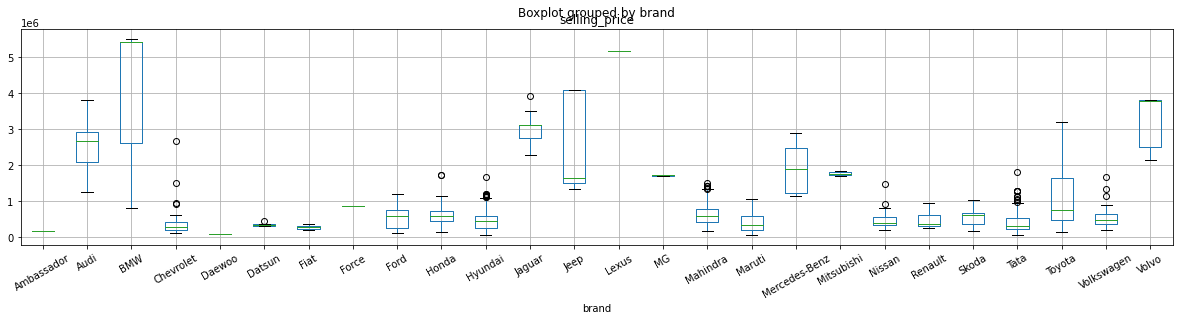

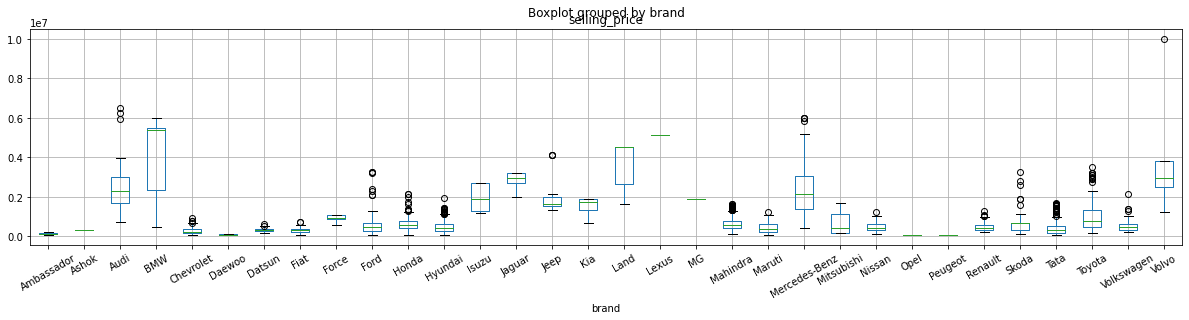

In [68]:
test_display.boxplot(column='selling_price', by='brand', figsize=(20,4), rot=30)
train.boxplot(column='selling_price', by='brand', figsize=(20,4), rot=30)

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

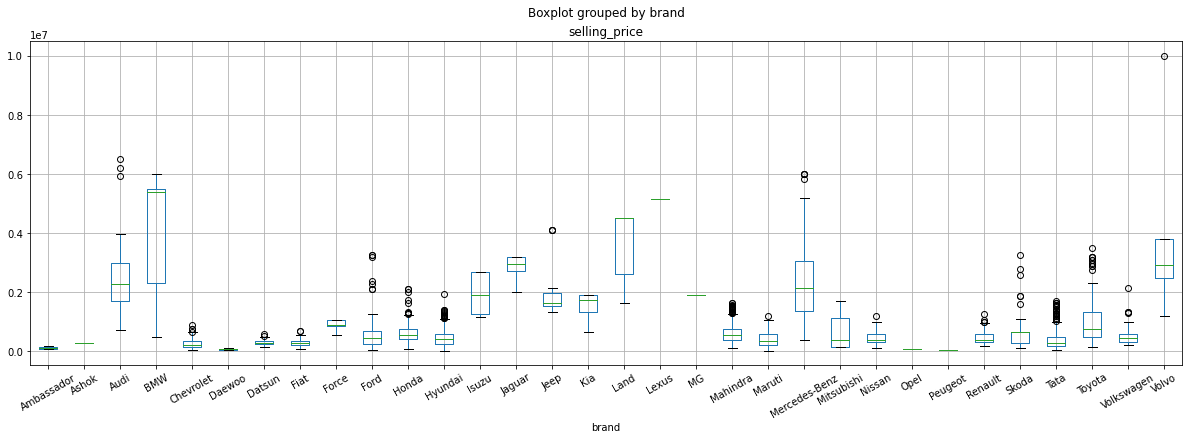

In [67]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [69]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,2523.0,63.00,180.00,2,1,0,0,1,1,0
